---


#  🟢 **Minicurso** - Processamento e Visualização de Imagens de Satélite, Dados de Precipitação e Índices de Vegetação com Python (PyVisSat)

---

> ## **Aula 2:** $\underline{Análise\ de\ Precipitação \ por\ Satélite}$

---
**OBJETIVO:**

- Nesta aula prática trabalharemos com dados de precipitação estimada por satélite. O objetivo desta aula é aprender como baixar, processar e gerar mapas e séries temporais de precipitação para o Brasil através do produto MERGE.

- O MERGE é um produto de estimativa de precipitação por satélite que combina as estimativas do IMERGE com as medições de pluviômetros, sendo disponibilizado pelo [CPTEC-INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/). Maiores informações sobre os dados podem ser encontrado no [READ-ME](https://github.com/evmpython/Minicurso_UFCG_nov_2025/blob/main/doc/MERGE_READ-ME.pdf) do MERGE e um detalhamento sobre a validação da precipitação do MERGE pode ser encontrado em [Rozante e Rozante (2024)](https://www.mdpi.com/2072-4292/16/24/4722).

---

**DADOS DE ENTRADA**:

Arquivos de precipitação.

1. $\underline{Dados\ horários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_2022090100.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/)

    ----------

2. $\underline{Dados\ diários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_20220801.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/)

    ----------

3. $\underline{Dados\ mensais}$:
- **Tipo do dado:** matriz de 691 linhas x 474 colunas
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** MERGE_CPTEC_acum_apr_2004.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/)

---

**DADOS DE SAÍDA:**
- Serão produzidas figuras no formato JPG.

---

**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nessa aula:

    1.   **1° Passo:** Instalação das Bibiotecas
    2.   **2° Passo:** Importação das Bibiliotecas
    3.   **3° Passo:** Montagem do Drive
    4.   **4° Passo:** Inserindo o Caminho do seu Drive
    5.   **5° Passo:** Carregando Shapefiles
    6.   **PARTE 1)**: Precipitação por Hora
    7.   **PARTE 2)**: Precipitação por Dia
    8.   **PARTE 3)**: Precipitação por Mês
    9.   **PARTE 4)**: Climatologia
    10.  **PARTE 5)**: Séries Temporais

---
**OBSERVAÇÕES IMPORTANTES**:
1. Necessário possuir uma conta do Gmail.
2. Salvar o código no seu drive. Para isto clicar em `Arquivo` e depois em `Salvar uma cópia no drive` e fazer o login numa conta google.


---

**REALIZADO E MINISTRADO POR:**
- **Realizado por:**  Prof. Dr. Enrique V. Mattos - 24/11/2025
- **Atualizado por:** Prof. Dr. Enrique V. Mattos - 24/11/2025
---

# **1° Passo:** Instalação das Bibliotecas


Note que o Google Colab roda uma máquina Linux na Nuvem que já tem o Python instalado.

In [ ]:
# vamos verificar a versão do python instalado no Google Colab
!python --version

O primeiro passo será instalar as bibliotecas necessárias (e suas dependências) para a execução dos códigos. Basicamente, as bibliotecas terão a seguinte finalidade:

*   `ultraplot:` Gerar gráficos de alta qualidade
*   `cartopy:` Gerar mapas cartográficos
*   `pygrib:` Leitura e processamento de arquivos no formato Grib
*   `geobr:` Trabalhar com shapefiles de municípios e estados
*   `salem:` Extrair dados de um shapefile
*   `rasterio, pyproj, geopandas e descartes:` Extrair informações de uma região

In [ ]:
# verificando as bibliotecas instaladas no Colab
!pip list

In [ ]:
# verificando se a biblioteca "ultraplot" esta instalada no Colab
!pip show ultraplot

In [ ]:
!pip install -q ultraplot cartopy pygrib geobr salem rasterio pyproj geopandas descartes

In [ ]:
# verificando se a biblioteca "ultraplot" foi instalada no Colab
!pip show ultraplot

# **2° Passo:** Importação das Bibliotecas

In [ ]:
import xarray as xr                         # Manipulação de dados multidimensionais
import glob                                 # Busca de arquivos com padrões
import ultraplot as uplt                    # Visualização otimizada para grandes datasets
import matplotlib                           # Biblioteca base para gráficos
import matplotlib.pyplot as plt             # Plotagem de gráficos
from matplotlib import cm                   # Mapas de cores
import cartopy, cartopy.crs as ccrs         # Mapas e projeções cartográficas
import cartopy.io.shapereader as shpreader  # Leitura de shapes geográficos
import os                                   # Operações do sistema operacional
import pandas as pd                         # Manipulação de dados tabulares
import salem                                # Análise de dados geoespaciais
import numpy as np                          # Computação numérica com arrays
import geobr                                # Dados geográficos do Brasil
import seaborn as sns                       # Visualização estatística
import pygrib                               # Leitura de arquivos GRIB (dados meteorológicos)
from datetime import datetime               # Manipulação de datas e horas
import scipy.ndimage                        # Processamento de imagens/arrays (filtros, interpolação)
import warnings                             # Controle de avisos
warnings.filterwarnings("ignore")           # Ignora avisos

# **3° Passo:** Montagem do Drive

Iremos gerar diversas figuras, assim convêm salvá-las num local no qual podemos acessá-las posteriormente. Para isto iremos montar o seu google drive para salvar as figuras nele. Assim rode a célula a seguir e conceda acesso do google colab ao seu drive, como mostrado a seguir:

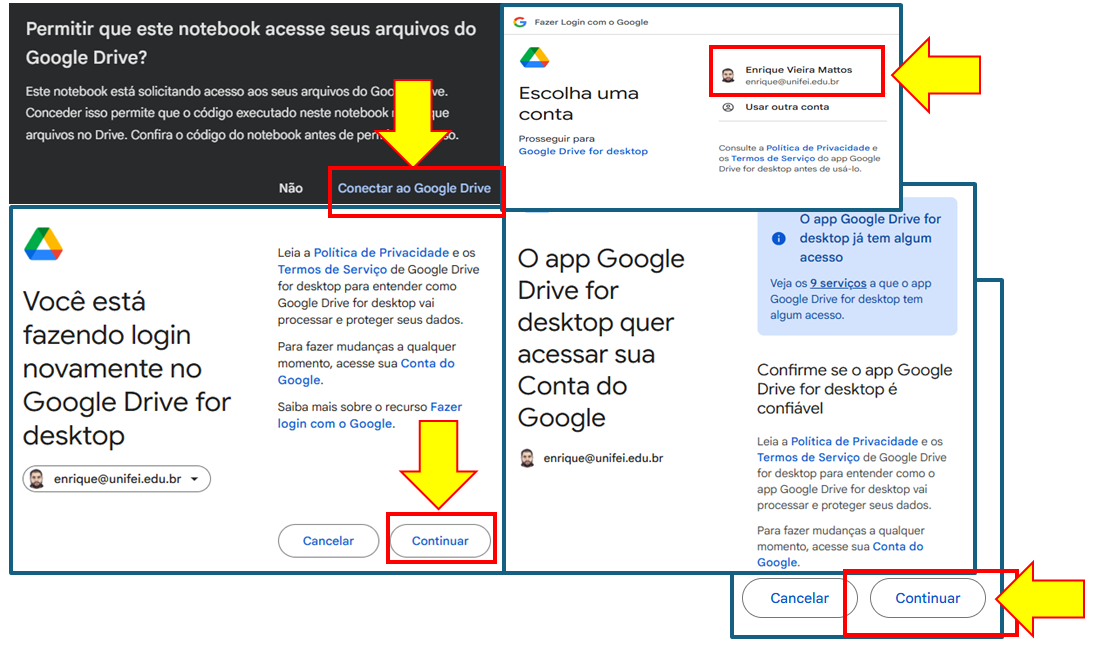

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **4° Passo:** Inserindo o Caminho do seu Drive

Na variável `dir`a seguir insira o caminho onde esta o seu código da Aula 2. Lembre-se de iniciar e terminar com aspas e uma barra inclinada a direita no início da linha.

In [ ]:
# caminho do seu drive
dir = '/content/drive/MyDrive/2_Minicurso_UFCG_nov_2025'

In [ ]:
# cria a pasta de entrada
dir_input = f'{dir}/input' ; os.makedirs(dir_input, exist_ok=True)

# cria a pasta de saída
dir_output = f'{dir}/output' ; os.makedirs(dir_output, exist_ok=True)

# **5° Passo:** Carregando shapefiles

Neste passo da aula iremos carregar os shapefiles que iremos utilizar para plotar os mapas. Os arquivos estão no [Github do curso](https://github.com/evmpython/Minicurso_UFCG_nov_2025/tree/main/utils) e serão lidos com a biblioteca `salem`. Iremos utilizar os seguintes shapefiles:

1.   `BRAZIL.shp:` contorno do continente brasileiro
2.   `regioes.shp:` contornos das 5 regiões do Brasil (norte, nordeste, centro-oeste, sul e sudeste)
3.   `BR_UF_2019.shp:` contornos dos 27 estados brasileiros


In [ ]:
# limites do Brasil
lonmin_BR, lonmax_BR, latmin_BR, latmax_BR = -75.0, -33.0, -35.0, 7.0

# leitura do shapefile que contêm o contorno do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BRAZIL.shp')

# leitura dos shapefiles das cinco regiões do Brasil
shapefile_regioes = salem.read_shapefile('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/regioes_2010.shp')

# seleciona o shapefile do Nordeste
shapefile_nordeste = shapefile_regioes.loc[shapefile_regioes['nome'] == 'Nordeste']

# limites do Nordeste
lonmin_NE, lonmax_NE, latmin_NE, latmax_NE = float(shapefile_nordeste['min_x']), float(shapefile_nordeste['max_x']), float(shapefile_nordeste['min_y']), float(shapefile_nordeste['max_y'])

# selecionando o shapefile de cada estado do Nordeste
shapefile_estados = salem.read_shapefile('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp')
shapefile_estados_nordeste = shapefile_estados.loc[ (shapefile_estados['SIGLA_UF'] == 'PB') |
                                                    (shapefile_estados['SIGLA_UF'] == 'AL') |
                                                    (shapefile_estados['SIGLA_UF'] == 'RN') |
                                                    (shapefile_estados['SIGLA_UF'] == 'PE') |
                                                    (shapefile_estados['SIGLA_UF'] == 'SE') |
                                                    (shapefile_estados['SIGLA_UF'] == 'BA') |
                                                    (shapefile_estados['SIGLA_UF'] == 'MA') |
                                                    (shapefile_estados['SIGLA_UF'] == 'PI') |
                                                    (shapefile_estados['SIGLA_UF'] == 'CE') ]

# **PARTE 1)**: Precipitação por `HORA`

Na primeira parte da nossa aula iremos aprender como gerar o mapa de precipitação para um determinado horário. Para isto utilizaremos os arquivos [horários](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/) do MERGE.

Os dados são disponíveis desde 2009 e estão organizados por ano e mês, com o nome na seguinte formatação: `MERGE_CPTEC_AAAAMMDDHH`. Por exemplo, o arquivo `MERGE_CPTEC_2019042022.grib2` refere-se ao arquivo das 22 horas do dia 20 de abril de 2019.

Para leitura dos dados em formato grib usaremos a função `pygrib.open` da biblioteca Grib.

In [ ]:
#========================================================================================================================#
#                                                DEFINE A DATA
#========================================================================================================================#
ano, mes, dia, hor = '2019', '04', '20', '22'

#========================================================================================================================#
#                                              PALETA DE CORES
#========================================================================================================================#
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000') # cor preta

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('white') # cor branca

#========================================================================================================================#
#                                                 BAIXA O DADO DO MERGE
#========================================================================================================================#
# definindo o caminho do FTP onde estão os dados por hora
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/'

# nome do arquivo
file = f'{ftp}{ano}/{mes}/{dia}/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2' # MERGE_CPTEC_2019042022.grib2

# baixa o arquivo
!wget {file}

# lendo o arquivo
grib = pygrib.open(f'/content/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2')

# selecionando o campo de precipitação
grb = grib.select(name='Precipitation from radar')[0]

# selecina a extensão da imagem [min. lon, min. lat, max. lon, max. lat]
extent = [lonmin_BR, latmin_BR, lonmax_BR, latmax_BR]

# extrai os dados para uma área específica
precip, lats, lons = grb.data(lat1=extent[1], lat2=extent[3], lon1=extent[0]+360, lon2=extent[2]+360)

#========================================================================================================================#
#                                                 PLOTA IMAGEM
#========================================================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(9.1,8.5), tight=True, proj='pcarree')

# define a formatação da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, abc=False,
          latlines=10, lonlines=10,
          latlim=(latmin_BR,latmax_BR), lonlim=(lonmin_BR,lonmax_BR),
          title=f'{ano}-{mes}-{dia} às {hor}:00 UTC',
          small='20px', large='20px')

# adiciona o seguinte texto no mapa "Fonte: MERGE/Pixel:10km"
ax.text(lonmax_BR-10, latmin_BR+0.5, 'Fonte: MERGE/Pixel:10km', color='black', fontsize=10)

# plota a figura
map1 = ax.contourf(lons, lats, precip, cmap=cmap, levels=uplt.arange(0.01, 80, 5), extend='max')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores
fig.colorbar(map1, loc='r', label='mm/h', ticks=5, ticklabelsize=13, labelsize=15, space=1.0, width=0.3, length=0.90)

# salva figura
fig.save(f'{dir_output}/Parte_1_precipitacao_horaria_{ano}-{mes}-{dia}_{hor}H.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Gerar imagem para uma data diferente
---

# **PARTE 2)**: Precipitação por `DIA`

Nesta parte da aula iremos produzir mapas de precipitação por dia. Para isto utilizaremos os arquivos [diários](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/) do MERGE.

Os dados são disponíveis desde 1998 e estão organizados por ano e mês, com o nome na seguinte formatação: `MERGE_CPTEC_AAAAMMDD`. Por exemplo, o arquivo `MERGE_CPTEC_20190420.grib2` refere-se ao arquivo do dia 20 de abril de 2019.

No exemplo a seguir baixaremos os dados dos dias 20, 21 e 22 de abril de 2019.

## **Baixando os dados**

In [ ]:
%%time
# ano, mês e dia INICIAL do período
anoi, mesi, diai = 2019, 4, 20

# ano, mês e dia FINAL do período
anof, mesf, diaf = 2019, 4, 22

# FTP dos dados por dia
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'

# data INICIAL no formato AAAAMMDD
date_in = datetime(anoi, mesi, diai)
date_ini = date_in.strftime('%Y%m%d')

# data FINAL no formato AAAAMMDD
date_en = datetime(anof, mesf, diaf)
date_end = date_en.strftime('%Y%m%d')

# número de dias
n_days = date_en - date_in

# download dos dados
for file in pd.date_range(date_ini, date_end, freq='d'):

    # extrai ano, mês e dia
    ano = file.strftime('%Y')
    mes = file.strftime('%m')
    dia = file.strftime('%d')

    # nome do arquivo
    filename = f'MERGE_CPTEC_{ano}{mes}{dia}.grib2'

    # ftp + ano + mês + filename. Exemplo: http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230920.grib2
    ftp_filename = f'{ftp}{ano}/{mes.zfill(2)}/{filename}'

    # baixando arquivo diário de chuva
    !wget {ftp_filename}

    print('\n---------------------')
    print('Downloading FTP File:')
    print('---------------------')
    print('Model: MERGE')
    print('File Name: ' + ftp_filename)

## **Calcula a chuva máxima, média e acumulada**

In [ ]:
# Loop nos arquivos diários
for dia in pd.date_range(date_ini, date_end, freq='d'):

    # Extrai no formato '2021-10-17 00:00:00' para '20211017'
    dia = dia.strftime('%Y%m%d')

    # Monta o nome do arquivo 'MERGE_CPTEC_20211001.grib2'
    file_name = f'MERGE_CPTEC_{str(dia)}.grib2'

    # Monta o caminho e nome do arquivo. Exemplo: '/content/input/MERGE_CPTEC_20211017.grib2'
    grib = f'/content/{file_name}'

    # Se o arquivo existe
    if (os.path.exists(grib)):

        # imprimindo na tela o arquivo atual
        print('Processando arquivo:', grib)

        # Lendo o arquivo
        grib = pygrib.open(grib)

        # Lendo o campo de Precipitação
        grb = grib.select(name='Precipitation from radar')[0]

        # Extrai os dados para uma área específica
        precip, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        # Suaviza os contornos
        precip = scipy.ndimage.zoom(precip, 3)
        lons = scipy.ndimage.zoom(lons, 3)
        lats = scipy.ndimage.zoom(lats, 3)

        # Se é o primeiro ciclo, cria um array que guardará os valores médios
        if (dia == date_ini):
            precip_sum = np.zeros((precip.shape[0], precip.shape[1]))
            precip_max = np.full((precip.shape[0], precip.shape[1]), -9999)
            precip_min = np.full((precip.shape[0], precip.shape[1]),  9999)

        # Soma os valores
        precip_sum = precip_sum + precip

        # Extrai o valor máximo
        precip_max = np.maximum(precip, precip_max)

        # Extrai o valor mínimo
        precip_min = np.minimum(precip, precip_min)

# Calcula o valor médio
precip_med = precip_sum / n_days.days

# colocar chuva abaixo de 1 mm/h como "Not a Number (NaN)"
precip_min[precip_min < 1] = np.nan
precip_max[precip_max < 1] = np.nan
precip_med[precip_med < 1] = np.nan
precip_sum[precip_sum < 1] = np.nan

## **Plota imagem**: Precipitação Máxima, Média e Acumulada  

In [ ]:
%%time
#========================================================================================================================#
#                                              PALETA DE CORES
#========================================================================================================================#
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000') # cor preta

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('white') # cor branca

#========================================================================================================================#
#                                                 PLOTA IMAGEM
#========================================================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(axwidth=5.5, axheight=5, tight=True, proj='pcarree', ncols=3, sharey=True, sharex=True)

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin_BR,latmax_BR),
          lonlim=(lonmin_BR,lonmax_BR),
          abc=True, abcstyle='a)', abcsize=5,
          small='16px', large='16px')

#-------------------------------#
# Figura 1: Precipitação Máxima
#-------------------------------#
# plota mapa
map1 = ax[0].contourf(lons, lats, precip_max, cmap=cmap, levels=uplt.arange(0, 150, 10), extend='max')

# plota título de figura
ax[0].format(title=f'Máxima: {date_ini}-{date_end}')
ax[0].text(lonmax_BR-15, latmin_BR+0.5, f'Fonte: MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[0].colorbar(map1, loc='b', label='mm/dia', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

#-------------------------------#
# Figura 2: Precipitação Média
#-------------------------------#
# plota mapa
map2 = ax[1].contourf(lons, lats, precip_med, cmap=cmap, levels=uplt.arange(0, 50, 2), extend='max')

# plota título de figura
ax[1].format(title=f'Média: {date_ini}-{date_end}')
ax[1].text(lonmax_BR-15, latmin_BR+0.5, f'Fonte: MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[1].colorbar(map2, loc='b', label='mm/dia', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

#-------------------------------#
# Figura 3: Precipitação Acumulada
#-------------------------------#
# plota mapa
map3 = ax[2].contourf(lons, lats, precip_sum, cmap=cmap, levels=uplt.arange(0, 250, 10), extend='max')

# plota título de figura
ax[2].format(title=f'Acumulada: {date_ini}-{date_end}')
ax[2].text(lonmax_BR-15, latmin_BR+0.5, f'Fonte: MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[2].colorbar(map3, loc='b', label='mm', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp').geometries())
ax[2].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)
#-------------------------------#

# salva figura
fig.save(f'{dir_output}/Parte_2_precipitacao_max_med_acum_{date_ini}_{date_end}.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Alterar o período dos dados
---

# **PARTE 3)**: Precipitação por `MÊS`

Nesta parte da aula iremos produzir mapas de precipitação por mês. Para isto utilizaremos os arquivos [mensais](https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/) do MERGE.

Os dados são disponíveis desde 1998 com o nome na seguinte formatação: `MERGE_CPTEC_acum_mes_ano.nc`. Por exemplo, o arquivo `MERGE_CPTEC_acum_apr_2019.nc` refere-se ao arquivo de abril de 2019.

Diferentemente dos arquivos horários e diários (que estão no formato grib), os arquivos mensais do MERGE estão no formato netCDF. Assim iremos ler o arquivo de `abril de 2019` com a função [`xarray.open_dataset`](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) da famosa biblioteca [`xarray`](https://docs.xarray.dev/en/stable/).

In [ ]:
#========================================================================================================================#
#                                               DEFINE ANO E MÊS
#========================================================================================================================#
ano, mes = '2019', 'apr'

#========================================================================================================================#
#                                              PALETA DE CORES
#========================================================================================================================#
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000') # cor preta

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('white') # cor branca

#========================================================================================================================#
#                                                 BAIXA O DADO DO MERGE
#========================================================================================================================#
# definindo o caminho do FTP onde estão os dados por mês
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

# dicionário de meses
meses_para_numero = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04',
                     'may': '05', 'jun': '06', 'jul': '07', 'aug': '08',
                     'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'}
mes_numero = meses_para_numero[mes.lower()]

# nome do arquivo
file = f'{ftp}MERGE_CPTEC_acum_{mes}_{ano}.nc'

# baixa o arquivo
!wget {file}

# leitura do dado
ds = xr.open_dataset(f'/content/MERGE_CPTEC_acum_{mes}_{ano}.nc').sel(lon=slice(lonmin_BR,lonmax_BR), lat=slice(latmin_BR,latmax_BR))

#========================================================================================================================#
#                                                 PLOTA IMAGEM
#========================================================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8.9,8.5), tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin_BR,latmax_BR), lonlim=(lonmin_BR,lonmax_BR),
          title=f'{ano}-{mes_numero}',
          small='16px', large='20px', abc=False)

# adiciona o seguinte texto no mapa "Fonte: MERGE/Pixel:10km"
ax.text(lonmax_BR-10, latmin_BR+0.5, f'Fonte: MERGE/Pixel:10km', color='black', fontsize=10)

# plota a figura
map1 = ax.contourf(ds['lon'], ds['lat'], ds['pacum'][0,:,:], cmap=cmap, levels=uplt.arange(0.01, 600, 50), extend='max')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores
fig.colorbar(map1, loc='r', label='mm/mês', ticks=50, ticklabelsize=13, labelsize=15, space=1.0, width=0.3, length=0.88)

# salva figura
fig.save(f'{dir_output}/Parte_3_precipitacao_mensal_{ano}-{mes_numero}.jpg', bbox_inches='tight', dpi=300)

# exibe a figura na tela
uplt.show()

In [ ]:
# mostrando os dados
ds

---
> `EXERCÍCIO:`
1.   Alterar o ano e mês
---

# **PARTE 4)**: `Climatologia`

É muito comum na meteorologia querermos entender o comportamento médio da precipitação numa determinada região. Para isto fazemos o uso de mapas médios de acumulado e anomalia de precipitação. Então nesta etapa da aula aprenderemos como produzir mapas médios mensais e anuais de precipitação para o Brasil e para a região Nordeste. Primeiramente realizaremos o download dos dados e depois produziremos os mapas.



## Download dos dados mensais do MERGE


Para produzirmos os mapas climatológicos de precipitação utilizaremos os dados mensais de precipitação do produto MERGE. Os dados estão alocados em arquivos em formato netCDF separados por mês, desde janeiro de 1998 até o presente e são disponibilizados no [FTP](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/) do INPE.

Baixaremos os dados através do famoso comando do Linux `wget` e os dados serão baixados para a pasta do seu drive que criamos chamada `input`.

O tempo estimado para baixar os `28 anos` de dados é de aproximadamente 16 min.

In [ ]:
%%time
# cria a pasta de saída
dir_output = f'{dir}/output' ; os.makedirs(dir_output, exist_ok=True)

# link do FTP dos dados mensal
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

# define o nome dos meses
meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# loop das datas
for data in pd.date_range('19980101','20251231', freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')
    nome_mes = data.strftime('%B')[0:3].lower() # nome do mês no formato: jan, feb e etc

    print('-------------------------------------------------------------------------------------')
    print(f'BAIXANDO ARQUIVO: {ano}-{mes}')
    print('---------------------------------------------------------------------------------- \n')

    # monta nome do arquivo
    file = f'{ftp}MERGE_CPTEC_acum_{nome_mes}_{ano}.nc' # MERGE_CPTEC_acum_dec_2017.nc

    # baixa arquivo
    !wget {file} -P {dir_output}

## 1) `Plotando  figura:` Acumulado e anomalia de precipitação para `Janeiro de 2025` para o Brasil

O primeiro mapa que iremos produzir será o mapa de acumulado de precipitação e anomalia de precipitação para Janeiro de 2025 para o Brasil. Primeiro realizaremos os cálculos necessários e depois produzemos o mapa.

### Cálculos

Iremos ler os arquivos do ano todo de uma única vez, e produziremos um único conjunto de dados. Para isto usaremos mais uma vez a biblioteca [**xarray**](https://docs.xarray.dev/en/stable/) com a função [**open_mfdataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html). Esta função serve para ler vários arquivos netCDF de uma única vez e carregá-los em um único dataset. Vejam como é fácil e rápido ler dezenas de arquivos!

In [ ]:
%%time
# data
ano, mes = '2025', '01'

# lista dos arquivos
files = sorted(glob.glob(f'{dir_input}/MERGE_CPTEC_*.nc'))

# lendo os dados
chuva_por_mes_1998_a_2025 = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# ordenando o tempo
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.sortby('time')

# CLIMATOLOGIA
climatologia = chuva_por_mes_1998_a_2025.sel(time=slice('1998-01-01','2020-12-01')).groupby("time.month").mean("time")

# ANOMALIA
anomalia = chuva_por_mes_1998_a_2025.sel(time=slice(f'{ano}-{mes}-01',f'{ano}-{mes}-01')).groupby("time.month") - climatologia

# recorta o dado para região
anomalia = anomalia.salem.roi(shape=shapefile_brasil)
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.salem.roi(shape=shapefile_brasil)

In [ ]:
# MENSAL
chuva_por_mes_1998_a_2025

In [ ]:
# CLIMATOLOGIA
climatologia

In [ ]:
# ANOMALIA
anomalia

In [ ]:
# plota gráfico simples
chuva_por_mes_1998_a_2025['pacum'].sel(time='2025-01-01T12:00:00.000000000').plot()

### Plota figura

In [ ]:
%%time
# cria a moldura da figura
fig, ax = uplt.subplots(axwidth=6, ncols=2, nrows=1, tight=True, proj='pcarree')

# define o nome dos meses
mes_dic =  {1: "Janeiro",
            2: "Fevereiro",
            3: "Março",
            4: "Abril",
            5: "Maio",
            6: "Junho",
            7: "Julho",
            8: "Augosto",
            9: "Setembro",
            10: "Outubro",
            11: "Novembro",
            12: "Dezembro"}
nome_mes = mes_dic[int(mes)]

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin_BR, latmax_BR), lonlim=(lonmin_BR, lonmax_BR),
          small='20px', large='25px',
          linewidth=0, grid=False, abc=False)

# plota subtítulo. Exemplo: "Janeiro de 2025"
ax.text(lonmin_BR, latmax_BR-1.0, f'{nome_mes} de {ano}', color='grey', fontsize=10)

#--------------------------------------------------------------#
#             FIGURA 1: ACUMULADO DE PRECIPITAÇÃO
#--------------------------------------------------------------#
# substituir "zeros" por "NaN" na variável "pacum"
chuva_por_mes_1998_a_2025['pacum'] = chuva_por_mes_1998_a_2025['pacum'].where(chuva_por_mes_1998_a_2025['pacum'] != 0, np.nan)

# plota mapa
map1 = ax[0].contourf(chuva_por_mes_1998_a_2025['lon'],
                      chuva_por_mes_1998_a_2025['lat'],
                      chuva_por_mes_1998_a_2025['pacum'].loc[f'{ano}-{mes}-01'][0,:,:],
                      cmap='oslo_r',
                      vmin=0, vmax=400,
                      levels=uplt.arange(0, 400, 25),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: MERGE/Pixel: 10km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': 50,
                                   'minorticks': False})

# título da figura
ax[0].format(title=f'Acumulado de Precipitação (mm)',
             titleloc='l',
             titleweight='bold',
             titlecolor='black')

# plota contorno dos Estados
shapefile_estados.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[0])

# plota contorno do Brasil
shapefile_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[0])

#--------------------------------------------------------------#
#           FIGURA 2: ANOMALIA DE PRECIPITAÇÃO
#--------------------------------------------------------------#
# plota mapa
ax[1].contourf(anomalia['lon'],
               anomalia['lat'],
               anomalia['pacum'].loc[f'{ano}-{mes}-01'][0,:,:],
               cmap='DryWet',
               vmin=-125, vmax=125,
               levels=uplt.arange(-125, 125, 25),
               extend='both',
               colorbar='best',
               colorbar_kw={'label': 'Fonte: MERGE/Pixel: 10km',
                            'length': 18,
                            'frameon': False,
                            'ticklabelsize': 10,
                            'labelsize': 7,
                            'width': 2,
                            'ticks': 50,
                            'minorticks': False})

# título da figura
ax[1].format(title=f'Anomalia de Precipitação (mm)',
             titleloc='l',
             titleweight='bold',
             titlecolor='black')

# plota contorno dos Estados
shapefile_estados.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[1])

# plota contorno do Brasil
shapefile_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[1])

# salva figura
fig.save(f'{dir_output}/Parte_4_climatologia_Fig_1_merge_precipitacao_e_anomalia_{ano}-{mes}.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Alterar ano e mês
2.   Alterar a paleta de cores do acumulado de precipitação: https://ultraplot.readthedocs.io/en/latest/colormaps.html
---

## 2) `Plotando  figura:` Acumulado médio mensal de precipitação entre 1998 e 2024 para o Nordeste

Iremos produzir o mapa médio mensal de precipitação para o Nordeste considerando o período de 1998 à 2025. Ou seja, iremos produzir o acumulado médio de precipitação para cada mês do ano.

### Cálculos

In [ ]:
%%time
# lista dos arquivos
files = sorted(glob.glob(f'{dir_input}/MERGE_CPTEC_*.nc'))

# lendo os dados
chuva_por_mes_1998_a_2025 = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# ordenando o tempo
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.sortby('time')

# calcula a média mensal
chuva_media_mensal = chuva_por_mes_1998_a_2025['pacum'].groupby('time.month').mean(dim='time')

# recorta o dado para região
chuva_media_mensal = chuva_media_mensal.salem.roi(shape=shapefile_nordeste)

In [ ]:
# mostra o dado
chuva_media_mensal

### Plota figura

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(ncols=4, nrows=3, axheight=3, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos. Para inserir os labels adicionar abc=True, abcstyle='a)', abcsize=5
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(latmin_NE-0.10, latmax_NE+0.10), lonlim=(lonmin_NE-0.10, lonmax_NE+0.10),
          suptitle=f'Precipitação Média Mensal: 1998-2025', abc=False,
          small='20px', large='30px')

# meses
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# loop dos meses
for i, mes in enumerate(meses):

    # plota figura
    if i == 0:
        map1 = ax[i].contourf(chuva_media_mensal['lon'],
                              chuva_media_mensal['lat'],
                              chuva_media_mensal[i,:,:],
                              cmap='oslo_r',
                              levels=uplt.arange(0.01, 300, 30),
                              extend='max')
    else:
        ax[i].contourf(chuva_media_mensal['lon'],
                       chuva_media_mensal['lat'],
                       chuva_media_mensal[i,:,:],
                       cmap='oslo_r',
                       levels=uplt.arange(0.01, 300, 30),
                       extend='max')

    # plota titulo de cada figura
    if (i == 0 or i==4): ax[i].format(title=mes, labels=[True, False, False, False], titlesize=20, titlecolor='gray')
    if (i == 1 or i==2 or i==3 or i==5 or i==6 or i==7): ax[i].format(title=mes, labels=False, titlesize=20, titlecolor='gray')
    if (i == 8): ax[i].format(title=mes, labels=[True, False, True, False], titlesize=20, titlecolor='gray')
    if (i == 9 or i == 10 or i==11): ax[i].format(title=mes, labels=[False, False, True, False], titlesize=20, titlecolor='gray')

    # plota os contornos dos estados do Nordeste
    shapefile_estados_nordeste.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])
    shapefile_nordeste.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[i])

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='mm/mês', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.3)

# salva figura
fig.save(f'{dir_output}/Parte_4_climatologia_Fig_2_merge_precipitacao_media_mensal_1998_a_2025.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Gerar o mapa para outra região do Brasil
2.   Alterar a paleta de cores do acumulado de precipitação
---

## 3) `Plotando  figura:` Acumulado e anomalia de precipitação para `2024` para o Brasil

É muito importante na meteorologia entendermos se a precipitação de um determinado ano esta acima ou abaixo da média climatológica. Para isto iremos produzir o mapa de acumulado e anomalia de precipitação para 2024 para o Brasil.

### Cálculos

In [ ]:
%%time
# escolha o ano
ano = '2024'

# lista dos arquivos
files = sorted(glob.glob(f'{dir_input}/MERGE_CPTEC_*.nc'))

# lendo os dados
chuva_por_mes_1998_a_2025 = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# ordenando o tempo
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.sortby('time')

# reamostra o dado por ano e soma a chuva de cada ano
chuva_por_ano = chuva_por_mes_1998_a_2025['pacum'].groupby('time.year').sum(dim='time')

# CLIMATOLOGIA: 1998 à 2020
climatologia = chuva_por_ano.sel(year=slice('1998','2020')).mean(dim="year")

# ANOMALIA
anomalia = chuva_por_ano.sel(year=slice(f'{ano}',f'{ano}')) - climatologia

# recorta o dado para região
chuva_por_ano = chuva_por_ano.salem.roi(shape=shapefile_brasil)
anomalia = anomalia.salem.roi(shape=shapefile_brasil)

In [ ]:
# MENSAL
chuva_por_mes_1998_a_2025

In [ ]:
# ANUAL
chuva_por_ano

In [ ]:
# CLIMATOLOGIA
climatologia

In [ ]:
# ANOMALIA
anomalia

In [ ]:
# plota gráfico simples
chuva_por_ano.sel(year=slice('2024','2024')).plot()

### Plota figura

In [ ]:
%%time
# cria a moldura da figura
fig, ax = uplt.subplots(axwidth=6, ncols=2, nrows=1, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin_BR, latmax_BR), lonlim=(lonmin_BR, lonmax_BR),
          small='20px', large='25px',
          linewidth=0, grid=False, abc=False)

# plota subtítulo. Exemplo: "2024"
ax.text(lonmin_BR, latmax_BR-1.0, f'{ano}', color='grey', fontsize=15)

#--------------------------------------------------------------#
#           FIGURA 1: ACUMULADO DE PRECIPITAÇÃO
#--------------------------------------------------------------#
# chuva do ano escolhido
chuva = chuva_por_ano.sel(year=slice(ano,ano))

# substituir "zeros" por "NaN"
chuva = chuva.where(chuva != 0, np.nan)

# plota mapa
map1 = ax[0].contourf(chuva['lon'],
                      chuva['lat'],
                      chuva[0,:,:],
                      cmap='oslo_r',
                      vmin=0, vmax=2000,
                      levels=uplt.arange(0, 2000, 50),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: MERGE/Pixel: 10km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': 500,
                                   'minorticks': False})

# título da figura
ax[0].format(title=f'Acumulado de Precipitação (mm)',
             titleloc='l',
             titleweight='bold',
             titlecolor='black')

# plota contorno dos Estados
shapefile_estados.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[0])

# plota contorno do Brasil
shapefile_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[0])

#--------------------------------------------------------------#
#           FIGURA 2: ANOMALIA DE PRECIPITAÇÃO
#--------------------------------------------------------------#
# plota mapa
ax[1].contourf(anomalia['lon'],
               anomalia['lat'],
               anomalia[0,:,:],
               cmap='DryWet',
               vmin=-300, vmax=300,
               levels=uplt.arange(-300, 300, 50),
               extend='both',
               colorbar='best',
               colorbar_kw={'label': 'Fonte: MERGE/Pixel: 10km',
                            'length': 18,
                            'frameon': False,
                            'ticklabelsize': 10,
                            'labelsize': 7,
                            'width': 2,
                            'ticks': 100,
                            'minorticks': False})

# título da figura
ax[1].format(title=f'Anomalia de Precipitação (mm)',
             titleloc='l',
             titleweight='bold',
             titlecolor='black')

# plota contorno dos Estados
shapefile_estados.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[1])

# plota contorno do Brasil
shapefile_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[1])

# salva figura
fig.save(f'{dir_output}/Parte_4_climatologia_Fig_3_merge_precipitacao_e_anomalia_{ano}.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Alterar o ano
2.   Alterar a paleta de cores do acumulado de precipitação
---

## 4) `Plotando  figura:` Acumulado de precipitação entre 2019 e 2024 para o Nordeste

Na próxima figura analisaremos o acumulado de precipitação por ano entre 2019 e 2024 para a região Nordeste. Assim, plotaremos 6 mapas de acumulado de precipitação.

### Cálculos

In [ ]:
%%time
# lista dos arquivos
files = sorted(glob.glob(f'{dir_input}/MERGE_CPTEC_*.nc'))

# lendo os dados
chuva_por_mes_1998_a_2025 = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# ordenando o tempo
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.sortby('time')

# soma a precipitação para cada ano
chuva_por_ano = chuva_por_mes_1998_a_2025['pacum'].groupby('time.year').sum(dim='time')

# recorta o dado para região
chuva_por_ano = chuva_por_ano.salem.roi(shape=shapefile_nordeste)

In [ ]:
# mostra os dados por ano
chuva_por_ano

### Plota figura

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10, 8.8),
                        nrows=2, ncols=3,
                        tight=True,
                        proj='pcarree',
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin_NE, latmax_NE), lonlim=(lonmin_NE, lonmax_NE),
          suptitle=f'Precipitação Anual: 2019-2024',
          small='20px', large='25px',
          linewidth=0, grid=False, abc=False)

# loop dos anos
for i, ano in enumerate(np.arange(2019, 2025)):

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {i} {ano}')

  # chuva do ano escolhido
  chuva = chuva_por_ano.sel(year=slice(str(ano),str(ano)))[0,:,:]

  # substituir "zeros" por "NaN"
  chuva = chuva.where(chuva != 0, np.nan)

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['lon'],
                        chuva_por_ano['lat'],
                        chuva,
                        cmap='DryWet',
                        vmin=0, vmax=1050,
                        levels=uplt.arange(0, 1050, 100),
                        extend='max')

  # plota titulo de cada figura
  ax[i].format(title=str(ano), labels = False, titleloc='c', titlecolor='grey', titleweight='bold')

  # plota os contornos dos estados do Nordeste
  shapefile_estados_nordeste.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])
  shapefile_nordeste.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[i])

# plota barra de cores da figura
fig.colorbar(map1,
             loc='b',
             label='mm/ano\nFonte: MERGE/Pixel: 10km',
             ticks=100,
             ticklabelsize=13,
             labelsize=13,
             length=0.85,
             width=0.25,
             space=0.0)

# salva figura
fig.save(f'{dir_output}/Parte_4_climatologia_Fig_4_merge_precipitacao_interanual_1999_2024.jpg', bbox_inches='tight', dpi=300)

---
> `EXERCÍCIO:`
1.   Mudar o período de dados
1.   Alterar a paleta de cores
---

# **PARTE 5)**: `Séries Temporais`

Na meteorologia é muito comum querermos analisar o comportamento histórico da precipitação para um determinado município ou região. Estas análises permitem avaliar a variação da precipitação ao longo dos anos e sabermos se a precipitação esta aumentando ou diminuindo naquela localidade. Para isto aprenderemos como produzir séries temporais de precipitação para uma determinada localidade.

O primeiro passo será fazer a leitura dos dados `mensais` de **1998 à 2025**  do MERGE e depois realizar a extração da precipitação para uma determinada localidade.

## Leitura dos dados

In [ ]:
%%time
# lista dos arquivos
files = sorted(glob.glob(f'{dir_input}/MERGE_CPTEC_*.nc'))

# lendo os dados
chuva_por_mes_1998_a_2025 = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# ordenando o tempo
chuva_por_mes_1998_a_2025 = chuva_por_mes_1998_a_2025.sortby('time')

In [ ]:
# mostra o dado
chuva_por_mes_1998_a_2025

## Extração da série temporal

Neste bloco de código é realizado a extração da série temporal de precipitação. Para isto você precisa definir a região que será calculada a série temporal. Esta escolha é feita na variável `tipo_regiao` e ela possui 5 opções de região:

---

1.   `estado:` extração da precipitação para um estado do Brasil. Para isto na variável `tipo_regiao` insira o nome `estado`, e dentro do bloco `if` insira o nome do estado na variável `nome`.  

2.   `municipio:` extração da precipitação para um município do Brasil. Para isto na variável `tipo_regiao` insira o nome `municipio`, e dentro do bloco `if` insira o nome do município na variável `nome`.

3.   `ponto:` extração da precipitação para uma latitude e longitude do Brasil. Para isto na variável `tipo_regiao` insira o nome `ponto`, e dentro do bloco `if` insira a latitude e longitude na variável `lat_central` e `lon_central`.

4.   `quadrado:` extração da precipitação para um quadrado do Brasil. Para isto na variável `tipo_regiao` insira o nome `quadrado`, e dentro do bloco `if` insira a latitude e longitude na variável `lat_central` e `lon_central` e a distância na variável `ds_km`.

5.   `shapefile_externo:` extração da precipitação usando um arquivo shapefile. Para isto na variável `tipo_regiao` insira o nome `shapefile_externo`, e dentro do bloco `if` insira o caminho onde esta o arquivo shapefile na variável `url`.



---



In [ ]:
%%time
#========================================================================================================================#
#                                              ESCOLHA O TIPO DE REGIÃO
#========================================================================================================================#
tipo_regiao = "municipio" # Opções: "estado", "municipio", "ponto", "quadrado", "shapefile_externo"

#========================================================================================================================#
#                                              CARREGA O SHAPEFILE
#========================================================================================================================#
if tipo_regiao == 'estado':

    # INSIRA o nome do estADO
    nome = 'Paraíba'

    # leitura do shapefile
    nome_completo = f'Estado: {nome}'
    shapefiles = geobr.read_state(year=2020)
    shapefile = shapefiles[shapefiles['name_state'] == nome]

    # aplica máscara nos dados do MERGE
    merge_regiao = chuva_por_mes_1998_a_2025.salem.roi(shape=shapefile)

    # calcula a média espacial dentro da região
    ts_mensal = merge_regiao.mean(dim=["lat", "lon"])

    # converte para DataFrame
    ts_mensal = ts_mensal.to_dataframe().reset_index()


elif tipo_regiao == 'municipio':

    # INSIRA o nome do município
    nome = 'Campina Grande'

    # leitura do shapefile
    nome_completo = f'Município: {nome}'
    shapefiles = geobr.read_municipality(code_muni="all", year=2020)
    shapefile = shapefiles [shapefiles['name_muni'] == nome]

    # aplica máscara nos dados do MERGE
    merge_regiao = chuva_por_mes_1998_a_2025.salem.roi(shape=shapefile)

    # calcula a média espacial dentro da região
    ts_mensal = merge_regiao.mean(dim=["lat", "lon"])

    # converte para DataFrame
    ts_mensal = ts_mensal.to_dataframe().reset_index()


elif tipo_regiao == 'ponto':

    # INSIRA a latitude e longitude
    lat_central = -15.9
    lon_central = -41.9

    # nome
    nome_completo = f'Ponto: Lat={lat_central} e Lon={lon_central}'

    # extrai a série temporal
    ts_mensal = chuva_por_mes_1998_a_2025.sel(lat=lat_central, lon=(lon_central), method='nearest')

    # converte para DataFrame
    ts_mensal = ts_mensal.to_dataframe().reset_index().drop(columns=['lat', 'lon'])

elif tipo_regiao == 'quadrado':

    # INSIRA a latitude, longitude e distância
    lat_central = -15.9
    lon_central = -41.9
    ds_km = 20 # =20 km

    # transforma de km para graus
    ds_graus = ds_km/100.0

    # limites do quadrado. Dimensoes de 40x40km2
    lat_min = lat_central - ds_graus
    lat_max = lat_central + ds_graus
    lon_min = lon_central - ds_graus
    lon_max = lon_central + ds_graus

    # recorta para um quadrado
    merge_regiao = chuva_por_mes_1998_a_2025.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    # calcula a média espacial dentro da região
    ts_mensal = merge_regiao.mean(dim=['lat', 'lon'])

    # converte para DataFrame
    ts_mensal = ts_mensal.to_dataframe().reset_index()

    # nome
    nome_completo = f'Quadrado: Lat=[{lat_min:.1f} a {lat_max:.1f}] e Lon=[{lon_min:.1f} a {lon_max:.1f}]'


elif tipo_regiao == 'shapefile_externo':

    # INSIRA a url do local do shapefile
    url = 'https://github.com/evmpython/Minicurso_UFCG_nov_2025/raw/main/utils/Bacia_Itacaiunas_contorno.shp'

    # leitura do shapefile
    shapefile = salem.read_shapefile(url)

    # aplica máscara nos dados do MERGE
    merge_regiao = chuva_por_mes_1998_a_2025.salem.roi(shape=shapefile)

    # calcula a média espacial dentro da região
    ts_mensal = merge_regiao.mean(dim=["lat", "lon"])

    # converte para DataFrame
    ts_mensal = ts_mensal.to_dataframe().reset_index()

    # nome
    nome_completo = f'Shapefile externo'

#========================================================================================================================#
#                                       TRANSFORMA A DATA PARA O ÍNDICE DA TABELA
#========================================================================================================================#
# transforma a coluna "time" para o índice da tabela
ts_mensal['time'] = pd.to_datetime(ts_mensal['time'])
ts_mensal.set_index('time', inplace=True)

# ordena o dataframe
ts_mensal = ts_mensal.sort_index()

In [ ]:
# mostra a tabela com a série temporal
ts_mensal

## 1) `Plotando Figura`: Total mensal

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(9,4.5), tight=True)

# plota gráfico de barras
ax.plot(ts_mensal['pacum'].index,
        ts_mensal['pacum'].values,
        color='blue')

# formato dos eixos
ax.format(ltitle=f"Precipitação Mensal Total (1998-2025)\n{nome_completo}",
          xlabel='Mês',
          ylabel='Precipitação [mm/mês]',
          small='20px',
          large='20px',
          xrotation=0,
          ytickminor=False,
          abc=False,
          ylim=(0,300))

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
fig.save(f'{dir_output}/Parte_5_serie_temporal_Fig_1_mensal_total_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

## 2) `Plotando Figura`: Total mensal da anomalia

In [ ]:
# mostra os dados que iremos utilizar
ts_mensal

In [ ]:
# calcula a climatologia
climatologia = ts_mensal['1998':'2020']['pacum'].mean()
climatologia

In [ ]:
# calcula a anomalia da série temporal
anomalia = ts_mensal['pacum'] - climatologia
anomalia

In [ ]:
# moldura da figura
fig, ax = uplt.subplots(figsize=(10,5), tight=True)

# plota gráfico de barras
ax.bar(anomalia.index,
       anomalia.values,
       negpos=True, negcolor='bright blue', poscolor='bright red', label='Anomalia')

# formato dos eixos - LABELS A CADA 2 ANOS
ax.format(ltitle=f"Anomalia da Precipitação Mensal (1998-2025)\n{nome_completo}",
          xlabel='Anos',
          ylabel='Anomalia de Precipitação [mm/mês]',
          small='15px',
          large='20px',
          xrotation=40,
          ytickminor=False,
          xtickminor=False,
          abc=False,
          xformatter='%Y',
          xlocator='year')

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
fig.save(f'{dir_output}/Parte_5_serie_temporal_Fig_2_anomalia_mensal_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

## 3) `Plotando Figura`: Distribuição mensal-boxplot

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4))

# criar boxplot de precipitação mensal
sns.boxplot(x=ts_mensal.index.month,
            y=ts_mensal['pacum'],
            ax=ax,
            color='bright blue')

# formatação dos eixos
ax.set_title(f"Distribuição da Precipitação Mensal ({ts_mensal.index.year[0]}-{ts_mensal.index.year[-1]})\n{nome_completo}", loc='left')
ax.set_xlabel('Mês', fontsize=10)
ax.set_ylabel('Precipitação [mm/mês]', fontsize=10)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax.set_xticks([], minor=True)
ax.set_yticks([], minor=True)

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
plt.savefig(f'{dir_output}/Parte_5_serie_temporal_Fig_3_mensal_boxplot_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

# exibe figura na tela
plt.tight_layout()
plt.show()

## 4) `Plotando Figura`: Mensal climatológica

In [ ]:
# dados que iremos utilizar
ts_mensal

In [ ]:
# climatológica
mensal_climatologia = ts_mensal.groupby(ts_mensal.index.month).mean()
mensal_climatologia

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8, 3), tight=True)

# precipitação
ax.bar(uplt.arange(1, 12, 1),
       mensal_climatologia['pacum'],
       color='blue',
       alpha=0.5)

# formatações
ax.format(ltitle=f"Precipitação Mensal Climatológica (1998-2025)\n{nome_completo}",
          xlabel='Mês', ylabel='Precipitação [mm/mês]',
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          xticks=uplt.arange(1, 12, 1),
          xtickminor=False, ytickminor=False, abc=False)

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
fig.save(f'{dir_output}/Parte_5_serie_temporal_Fig_4_mensal_climatologica_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

## 5) `Plotando Figura`: Anual

In [ ]:
# dados que iremos utilizar
ts_mensal

In [ ]:
# agrupando por ano e somando a precipitação para cada ano
anual = ts_mensal.groupby(pd.Grouper(freq='1Y')).sum()
anual

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual['pacum'].values,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(ltitle=f'Precipitação Anual Total (1998-2025)\n{nome_completo}',
          xlabel='Ano',
          ylabel='Precipitação [mm/ano]',
          small='15px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=uplt.arange( anual.index.year[0], anual.index.year[-1], 1),
          xrotation=40, abc=False)

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
fig.save(f'{dir_output}/Parte_5_serie_temporal_Fig_5_total_anual_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

## 6) `Plotando Figura`: Anomalia Anual

In [ ]:
# mostra os dados que iremos utilizar
anual

In [ ]:
# calcula a climatologia
climatologia = anual['1998':'2020']['pacum'].mean()
climatologia

In [ ]:
# calcula a anomalia da série temporal
anomalia = anual['pacum'] - climatologia
anomalia

In [ ]:
# moldura da figura
fig, ax = uplt.subplots(figsize=(10,5), tight=True)

# plota gráfico de barras
ax.bar(anomalia.index.year,
       anomalia.values,
       negpos=True, negcolor='bright blue', poscolor='bright red', label='Anomalia')

# Configura TODOS os anos manualmente
anos_unicos = sorted(anomalia.index.year.unique())
ax.set_xticks(anos_unicos)  # Força todos os anos como ticks

# formato dos eixos
ax.format(ltitle=f"Anomalia da Precipitação Anual (1998-2025)\n{nome_completo}",
          xlabel='Anos',
          ylabel='Anomalia de Precipitação [mm/ano]',
          small='15px',
          large='20px',
          xrotation=40,
          ytickminor=False,
          xtickminor=False,
          abc=False)

# salva figura
nome_completo2 = nome_completo.replace(": ", "_").replace(" ", "_").lower()
fig.save(f'{dir_output}/Parte_5_serie_temporal_Fig_6_anomalia_anual_{nome_completo2}.jpg', bbox_inches='tight', dpi=300)

# **Parabéns**, você chegou ao final de mais uma aula do curso `PyVisSat` !!! 👏 👏 👏

Muito obrigado pela sua participação, e nos vamos na próxima aula. E lembre-se, `Python é vida` !!!

![Texto alternativo](https://github.com/evmpython/Minicurso_UFCG_nov_2025/blob/main/logo/istockphoto-1292897490-612x612.jpg?raw=true)